Decision Trees and Random Forests

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [54]:
data = pd.read_csv('heart.csv')

In [55]:
df = pd.DataFrame(data)
print(df.head(15))

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    52    1   0       125   212    0        1      168      0      1.0   
1    53    1   0       140   203    1        0      155      1      3.1   
2    70    1   0       145   174    0        1      125      1      2.6   
3    61    1   0       148   203    0        1      161      0      0.0   
4    62    0   0       138   294    1        1      106      0      1.9   
5    58    0   0       100   248    0        0      122      0      1.0   
6    58    1   0       114   318    0        2      140      0      4.4   
7    55    1   0       160   289    0        0      145      1      0.8   
8    46    1   0       120   249    0        0      144      0      0.8   
9    54    1   0       122   286    0        0      116      1      3.2   
10   71    0   0       112   149    0        1      125      0      1.6   
11   43    0   0       132   341    1        0      136      1      3.0   
12   34    0   1       11

In [56]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [58]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [59]:
X = df.drop('target', axis=1)
y = df['target']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [62]:
dot_data = export_graphviz(clf,
                           out_file=None,
                           feature_names=X.columns,
                           class_names=['No Disease', 'Disease'],
                           filled=True, rounded=True,
                           special_characters=True)

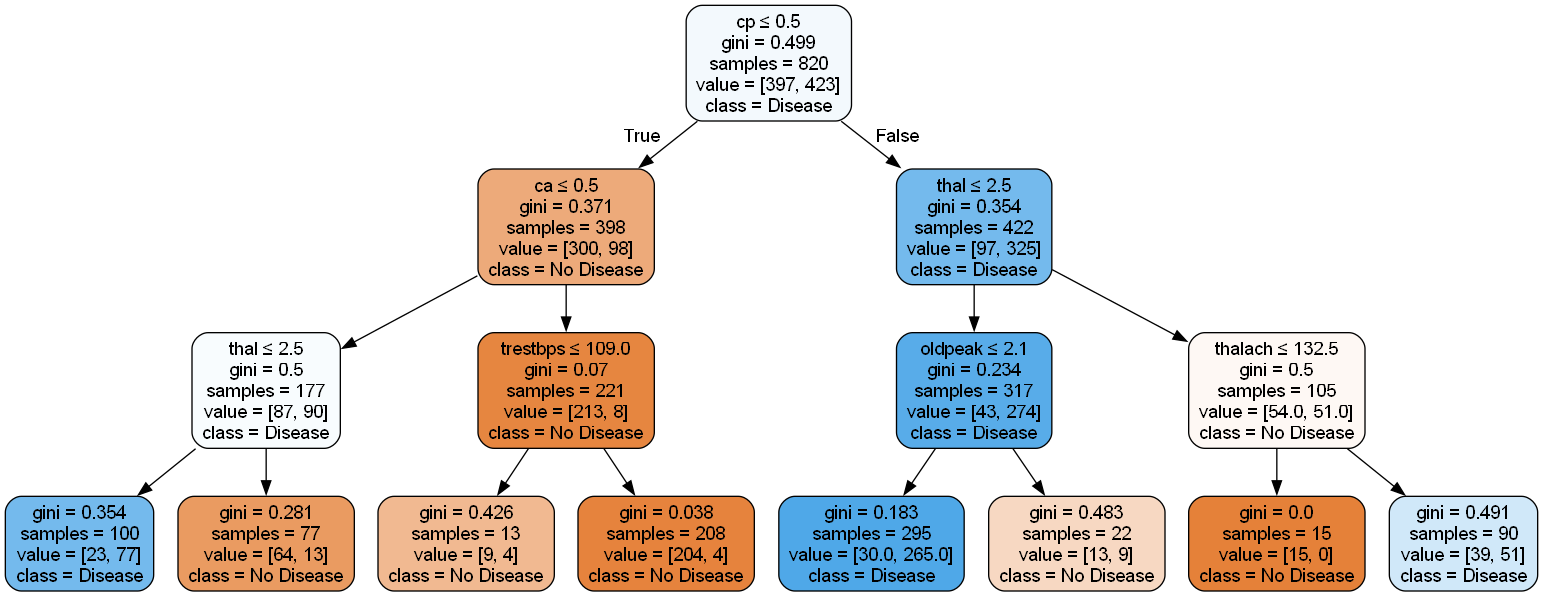

In [63]:
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format='png')  # Saves as decision_tree.pdf
Image(filename="decision_tree.png")

In [64]:
train_accuracies = []
test_accuracies = []
depths = range(1, 21)

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    train_accuracies.append(clf.score(X_train, y_train))  # Training accuracy
    test_accuracies.append(clf.score(X_test, y_test))      # Test accuracy

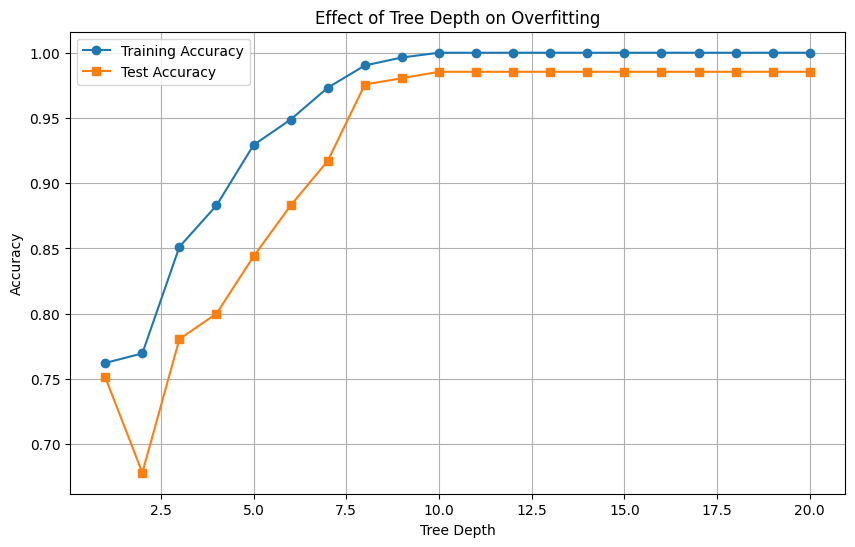

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Effect of Tree Depth on Overfitting')
plt.legend()
plt.grid(True)
plt.show()


In [66]:
# Accuracy
dt_train_acc = clf.score(X_train, y_train)
dt_test_acc = clf.score(X_test, y_test)


In [67]:
# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Accuracy
rf_train_acc = rf_clf.score(X_train, y_train)
rf_test_acc = rf_clf.score(X_test, y_test)

In [68]:
print(f"Decision Tree - Train Accuracy: {dt_train_acc:.2f}, Test Accuracy: {dt_test_acc:.2f}")
print(f"Random Forest - Train Accuracy: {rf_train_acc:.2f}, Test Accuracy: {rf_test_acc:.2f}")

Decision Tree - Train Accuracy: 1.00, Test Accuracy: 0.99
Random Forest - Train Accuracy: 1.00, Test Accuracy: 0.99


Feature importance

In [69]:
importances = rf_clf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)

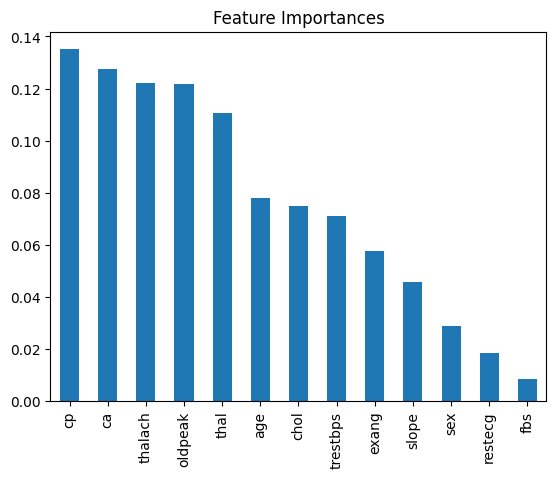

In [70]:
feat_importances = feat_importances.sort_values(ascending=False)
feat_importances.plot(kind='bar')
plt.title("Feature Importances")
plt.show()

In [71]:
dt_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Decision Tree CV Accuracy scores:", dt_scores)
print("Decision Tree CV Accuracy mean:", np.mean(dt_scores))

Decision Tree CV Accuracy scores: [1. 1. 1. 1. 1.]
Decision Tree CV Accuracy mean: 1.0


In [72]:
rf_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
print("Random Forest CV Accuracy scores:", rf_scores)
print("Random Forest CV Accuracy mean:", np.mean(rf_scores))

Random Forest CV Accuracy scores: [1.         1.         1.         1.         0.98536585]
Random Forest CV Accuracy mean: 0.9970731707317073
